In [2]:
import pandas as pd
from statsmodels.stats import diagnostic
from scipy import stats
import matplotlib.pyplot as plt

# Création d'un DataFrame d'exemple
data = {
    'Nom': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
    'Age': [25, 30, 35, 40, 28, 33],
    'Ville': ['Paris', 'Lyon', 'Marseille', 'Toulouse', 'Nice', 'Nantes']
,
    'Profession': ['Ingénieur', 'Médecin', 'Artiste', 'Avocat', 'Professeur', 'Scientifique'],
    'Salaire': [50000, 70000, 45000, 60000, 52000, 58000]
}

df = pd.DataFrame(data)
df.head()

,Nom,Age,Ville,Profession,Salaire
0,Alice,25,Paris,Ingénieur,50000
1,Bob,30,Lyon,Médecin,70000
2,Charlie,35,Marseille,Artiste,45000
3,David,40,Toulouse,Avocat,60000
4,Eve,28,Nice,Professeur,52000


### Statistics description

In [3]:
# Affichage des statistiques descriptives
display(df["Age"].describe())
# sample() permet de tirer un échantillon aléatoire de taille n sans remise (replace=False) ou avec remise (replace=True). weights permet d'afficher un échantillon pondéré.
sample2_counties = df.sample(n=10, replace=False, weights=df['Salaire']) 

count     6.000000
mean     31.833333
std       5.344779
min      25.000000
25%      28.500000
50%      31.500000
75%      34.500000
max      40.000000
Name: Age, dtype: float64

ValueError: Cannot take a larger sample than population when 'replace=False'

### P-values

In [ ]:
# La p-value est une mesure statistique qui aide à déterminer la signification des résultats obtenus lors d'un test d'hypothèse.
# Elle représente la probabilité d'obtenir un résultat au moins aussi extrême que celui observé, en supposant que l'hypothèse nulle est vraie.

"""
if p-value < 0.05:
    On rejette l'hypothèse nulle
else:
    On ne rejette pas l'hypothèse nulle
"""



0.134205978154889 0.9809729598368002


<Axes: >

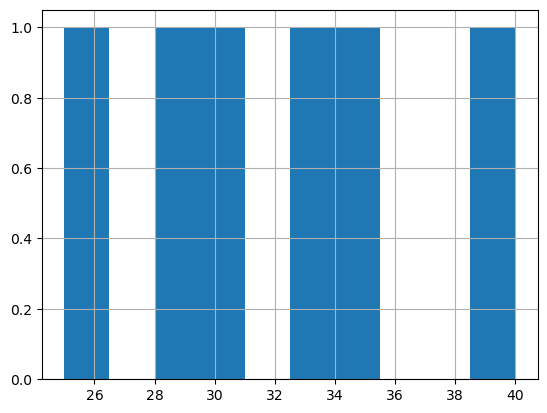

In [17]:
# Test de normalité sur l'âge 
statistique , p_value = diagnostic.kstest_normal(df['Age'].values, dist = 'norm') #dist = ['norm', 'exp'] 
# return (statistic, pvalue) pvalue < 0.05 => hypothèse nulle rejetée (donc pas de distribution normale)
print(statistique, p_value)
df["Age"].hist()
#hypothèse nulle : la distribution suit une loi normale

### Test de corrléation entre les features

In [18]:
# Ajout des colonnes 'IncomePerCap' et 'Employed' au DataFrame
df['IncomePerCap'] = df['Salaire'] / df['Age']  # Exemple de calcul pour 'IncomePerCap'
df['Employed'] = [1, 1, 0, 1, 0, 1]  # Exemple de données pour 'Employed'

# Calcul du coefficient de corrélation de Pearson
correlation, p_value = stats.pearsonr(df['IncomePerCap'], df['Employed'])
print(correlation, p_value)
#hypothèse nulle : pas de corrélation entre les deux variables
#correlation faible et p-values < 0.05 => hypothèse nulle rejetée (donc corrélation)
#correlation forte et p-values < 0.05 => hypothèse nulle rejetée (donc corrélation)
#correlation faible et p-values > 0.05 => hypothèse nulle acceptée (donc pas de corrélation)
#correlation forte et p-values > 0.05 => hypothèse nulle acceptée (donc pas de corrélation)

0.4558155173086393 0.3636286144236981


### Test d'hypothèse sur les données

In [19]:
stats.ttest_ind(df['Salaire'], df['Age'])
#hypothèse nulle : les deux échantillons ont la même moyenne
#p-values < 0.05 => hypothèse nulle rejetée (donc pas la même moyenne)
#p-values > 0.05 => hypothèse nulle acceptée (donc la même moyenne)
#ici, hypothèse nulle rejetée (donc pas la même moyenne)

TtestResult(statistic=15.49974940711672, pvalue=2.5506885509441548e-08, df=10.0)

In [ ]:
print(f"Spearman correlation between Price and Mileage: {df_clean['Price'].corr(df_clean['Mileage'], method='spearman'):.4f}")